In [87]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [113]:
import numpy as np

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [89]:
dataframe_study = pd.read_csv("datasetAgrupado28.csv")

In [90]:
dataframe_study.drop(columns="Unnamed: 0",inplace=True)
dataframe_study.head()

,player,season_1,had_major_injury_28,nation,pos,age,born,MP,Starts,Min,...,passing,dribbling,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength
0,Aaron Cresswell,18/19,True,ENG,DF,27.0,1989.0,36.0,35.0,3069,...,72.0,76.0,73.0,68.0,75.0,76.0,68.0,90.0,82.0,59.0
1,Aaron Cresswell,19/20,False,ENG,DF,28.0,1989.0,20.0,18.0,1589,...,74.0,76.0,74.0,69.0,74.0,72.0,73.0,85.0,74.0,62.0
2,Aaron Cresswell,20/21,False,ENG,DF,29.0,1989.0,31.0,31.0,2727,...,73.0,75.0,74.0,67.0,74.0,69.0,73.0,83.0,71.0,61.0
3,Aaron Cresswell,24/25,False,ENG,"DF,FW",33.0,1989.0,11.0,4.0,436,...,75.0,75.0,77.0,67.0,66.0,51.0,78.0,75.0,73.0,61.0
4,Aaron Mooy,18/19,True,AUS,MF,26.0,1990.0,36.0,34.0,3067,...,77.0,74.0,66.0,76.0,67.0,70.0,69.0,73.0,78.0,76.0


In [91]:
dataframe_study["season_1"].value_counts(normalize=True)

season_1
23/24    0.160455
20/21    0.159033
21/22    0.159033
22/23    0.151769
24/25    0.133449
19/20    0.129817
18/19    0.106443
Name: proportion, dtype: float64

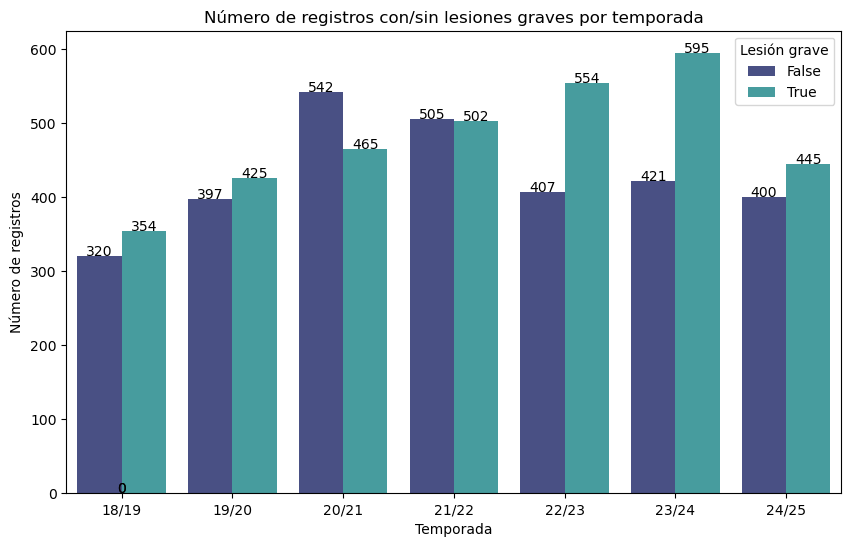

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

temporadas_ordenadas = ["18/19", "19/20", "20/21", "21/22", "22/23", "23/24", "24/25"]

plt.figure(figsize=(10,6))
ax = sns.countplot(
    x="season_1",
    hue="had_major_injury_28",
    data=dataframe_study,
    palette="mako",
    order=temporadas_ordenadas
)

plt.title("Número de registros con/sin lesiones graves por temporada")
plt.xlabel("Temporada")
plt.ylabel("Número de registros")
plt.legend(title="Lesión grave")


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,  
        height + 1,                     
        int(height),                     
        ha="center"
    )

plt.show()


In [93]:
dataframe_study["had_major_injury_28"].value_counts()

had_major_injury_28
True     3340
False    2992
Name: count, dtype: int64

/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_14072/3316368016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="had_major_injury_28", data=dataframe_study, palette="mako")


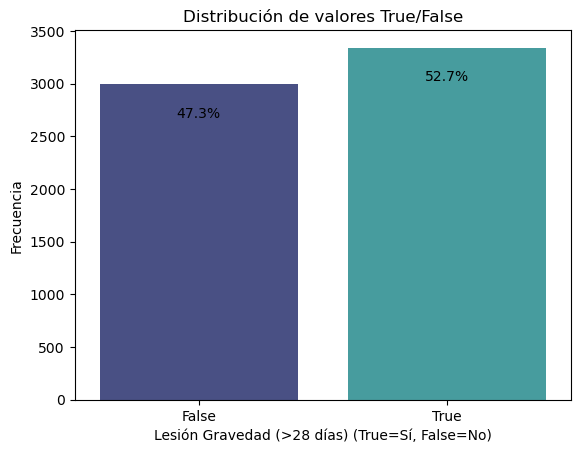

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="had_major_injury_28", data=dataframe_study, palette="mako")

total = len(dataframe_study)

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        height - 0.05 * total,          
        percentage,
        ha="center"
    )

plt.title("Distribución de valores True/False")
plt.xlabel("Lesión Gravedad (>28 días) (True=Sí, False=No)")
plt.ylabel("Frecuencia")
plt.show()


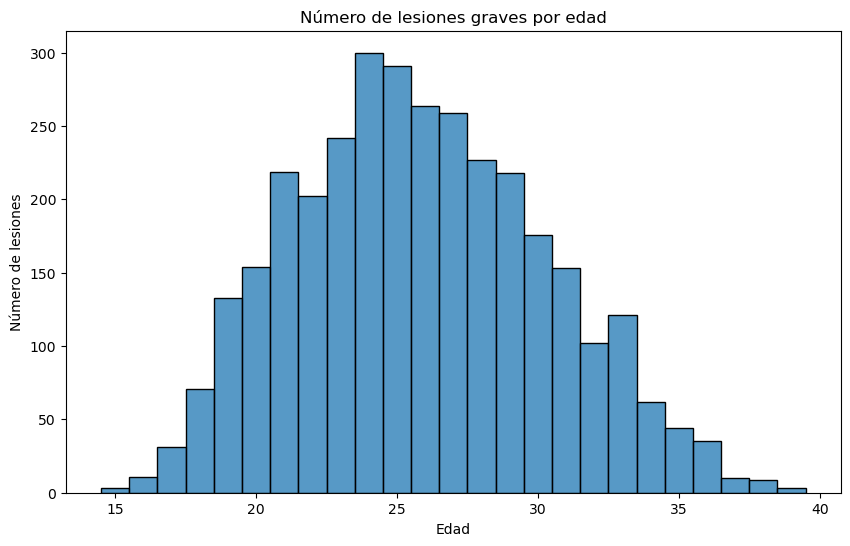

In [ ]:
df_lesiones = dataframe_study[dataframe_study["had_major_injury_28"] == True]

plt.figure(figsize=(10,6))
sns.histplot(
    data=df_lesiones,
    x="age",     
    discrete=True   
)

plt.title("Número de lesiones graves por edad")
plt.xlabel("Edad")
plt.ylabel("Número de lesiones")
plt.show()


In [98]:
dataframe_study.columns

Index(['player', 'season_1', 'had_major_injury_28', 'nation', 'pos', 'age',
       'born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
       'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90', 'Unnamed: 0_y',
       'height_cm', 'weight_kg', 'work_rate', 'body_type', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'movement_acceleration',
       'movement_sprint_speed', 'movement_reactions', 'movement_balance',
       'power_stamina', 'power_strength'],
      dtype='object')

### Preprocesado
#### Valores faltantes, estadistica descriptiva, normalizacion, histograma

In [99]:
dataframe_study=dataframe_study.drop(columns='Unnamed: 0_y')

In [101]:
num_cols = dataframe_study.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = dataframe_study.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

In [102]:
dataframe_study.describe()

,age,born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,...,passing,dribbling,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000
mean,25.782059,1994.018320,21.241472,16.262160,1453.980417,16.155764,2.290745,1.585597,3.876342,2.083702,...,65.754086,70.786963,59.059483,69.274040,70.756366,71.284873,71.767199,67.855758,71.486507,69.278981
std,4.420077,4.504545,10.781248,10.913777,938.205822,10.424716,3.804406,2.274157,5.362933,3.371479,...,10.361750,9.809400,18.522986,9.425352,11.746043,11.214333,8.594697,12.667952,10.773599,12.156213
min,14.000000,1978.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,32.000000,15.000000,33.000000,29.000000,29.000000,37.000000,27.000000,30.000000,25.000000
25%,23.000000,1991.000000,13.000000,7.000000,656.750000,7.300000,0.000000,0.000000,0.000000,0.000000,...,59.000000,65.000000,42.000000,64.000000,64.000000,65.000000,67.000000,60.000000,65.000000,62.000000
50%,25.000000,1994.000000,23.000000,16.000000,1428.500000,15.900000,1.000000,1.000000,2.000000,1.000000,...,67.000000,72.000000,66.000000,71.000000,72.000000,72.000000,73.000000,69.000000,72.000000,71.000000
75%,29.000000,1997.000000,30.000000,25.000000,2209.000000,24.500000,3.000000,2.000000,5.000000,3.000000,...,73.000000,78.000000,74.000000,76.000000,78.000000,79.000000,77.000000,77.000000,78.000000,78.000000
max,39.000000,2007.000000,38.000000,38.000000,3420.000000,38.000000,41.000000,21.000000,48.000000,33.000000,...,94.000000,96.000000,91.000000,91.000000,97.000000,96.000000,96.000000,96.000000,97.000000,95.000000


In [110]:
6332-5262

1070

In [103]:
5262/6332

0.8310170562223625

In [116]:
df_clean = dataframe_study.dropna()

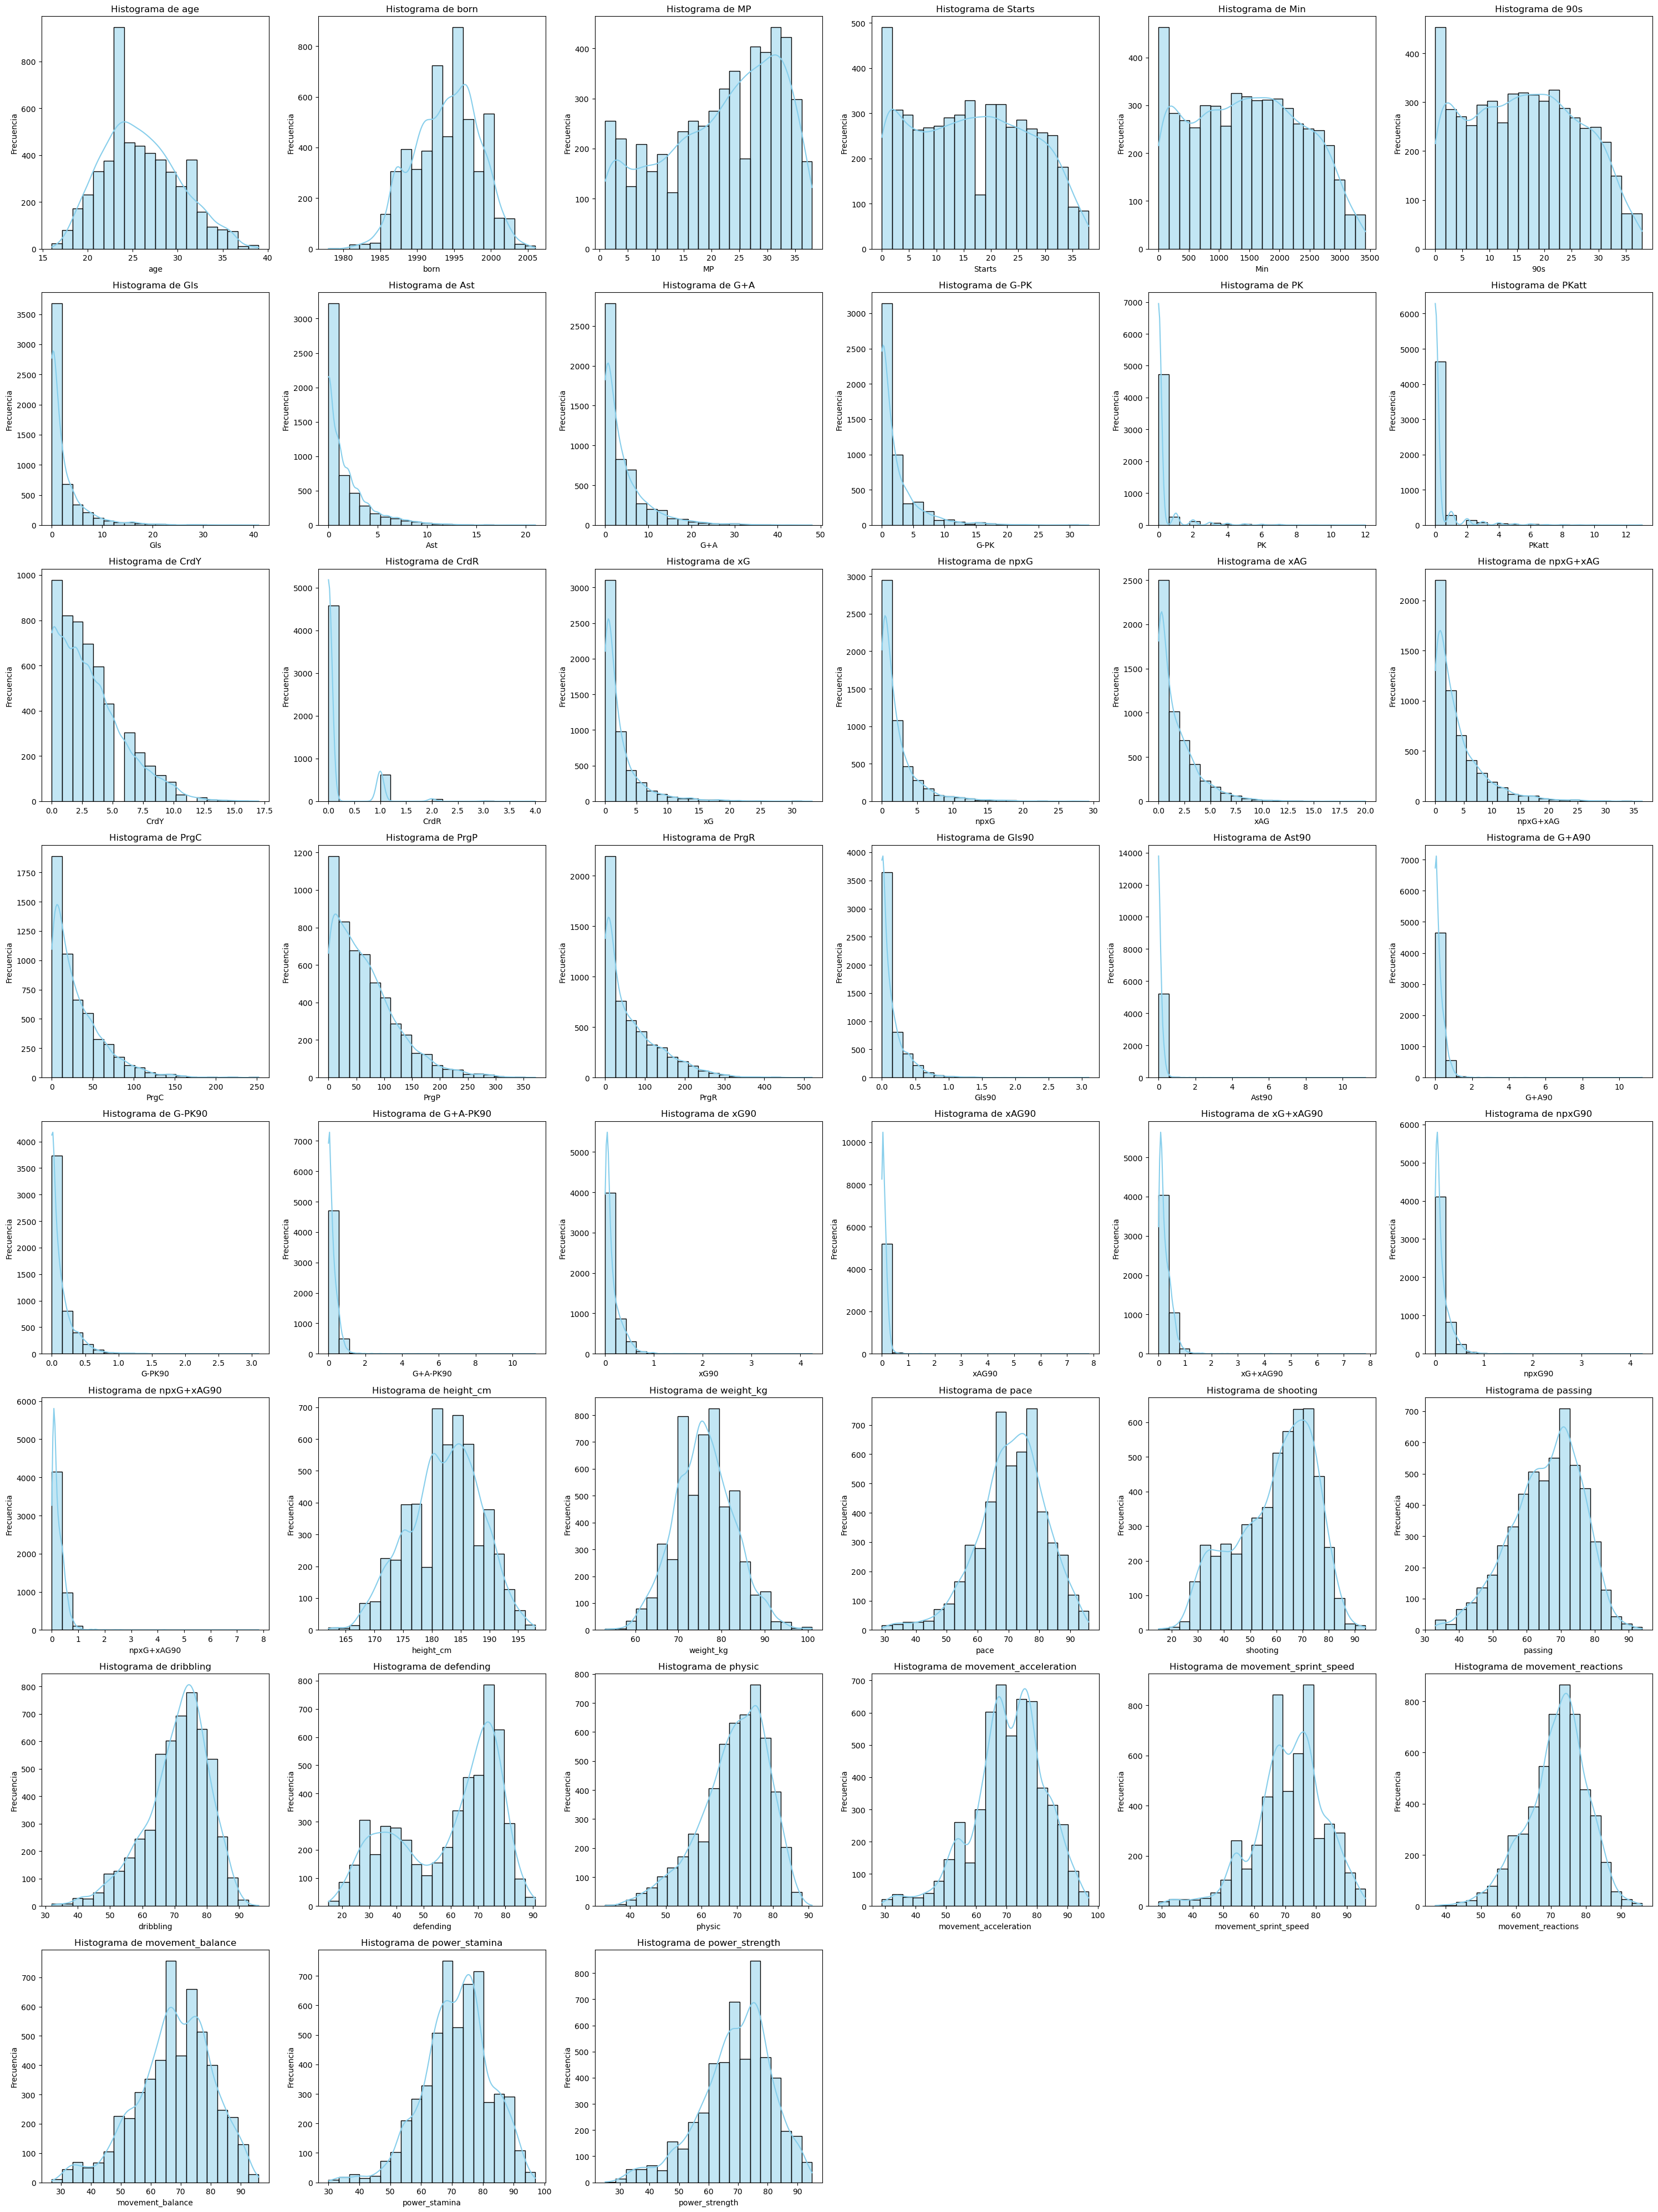

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns


n = len(num_cols)
ncols = 6 
nrows = (n // ncols) + 1

plt.figure(figsize=(30, 5*nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df_clean[col], kde=True, color="skyblue", bins=20)
    plt.title(f"Histograma de {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Decidimos eliminar los registros que tienen datos faltantes, pues suponen el 17% de los registros en total del dataset, por lo que no supone una reducción drastica del dataset

In [118]:
df_clean.columns

Index(['player', 'season_1', 'had_major_injury_28', 'nation', 'pos', 'age',
       'born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
       'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90', 'height_cm', 'weight_kg',
       'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'movement_balance', 'power_stamina',
       'power_strength'],
      dtype='object')

In [119]:
right_skew_columns = ['Gls', 'Ast', 'G+A', 'G-PK', 'PK',
'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90']
standard_columns = ['age','born', 'MP', 'Starts', 'Min', '90s','height_cm', 'weight_kg','pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'movement_balance', 'power_stamina',
       'power_strength']

In [120]:
df_clean[right_skew_columns] = np.log1p(df_clean[right_skew_columns])

scaler = StandardScaler()
df_clean[standard_columns+right_skew_columns] = scaler.fit_transform(df_clean[standard_columns+right_skew_columns])

/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_14072/2382405508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[right_skew_columns] = np.log1p(df_clean[right_skew_columns])
/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_14072/2382405508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[standard_columns+right_skew_columns] = scaler.fit_transform(df_clean[standard_columns+right_skew_columns])


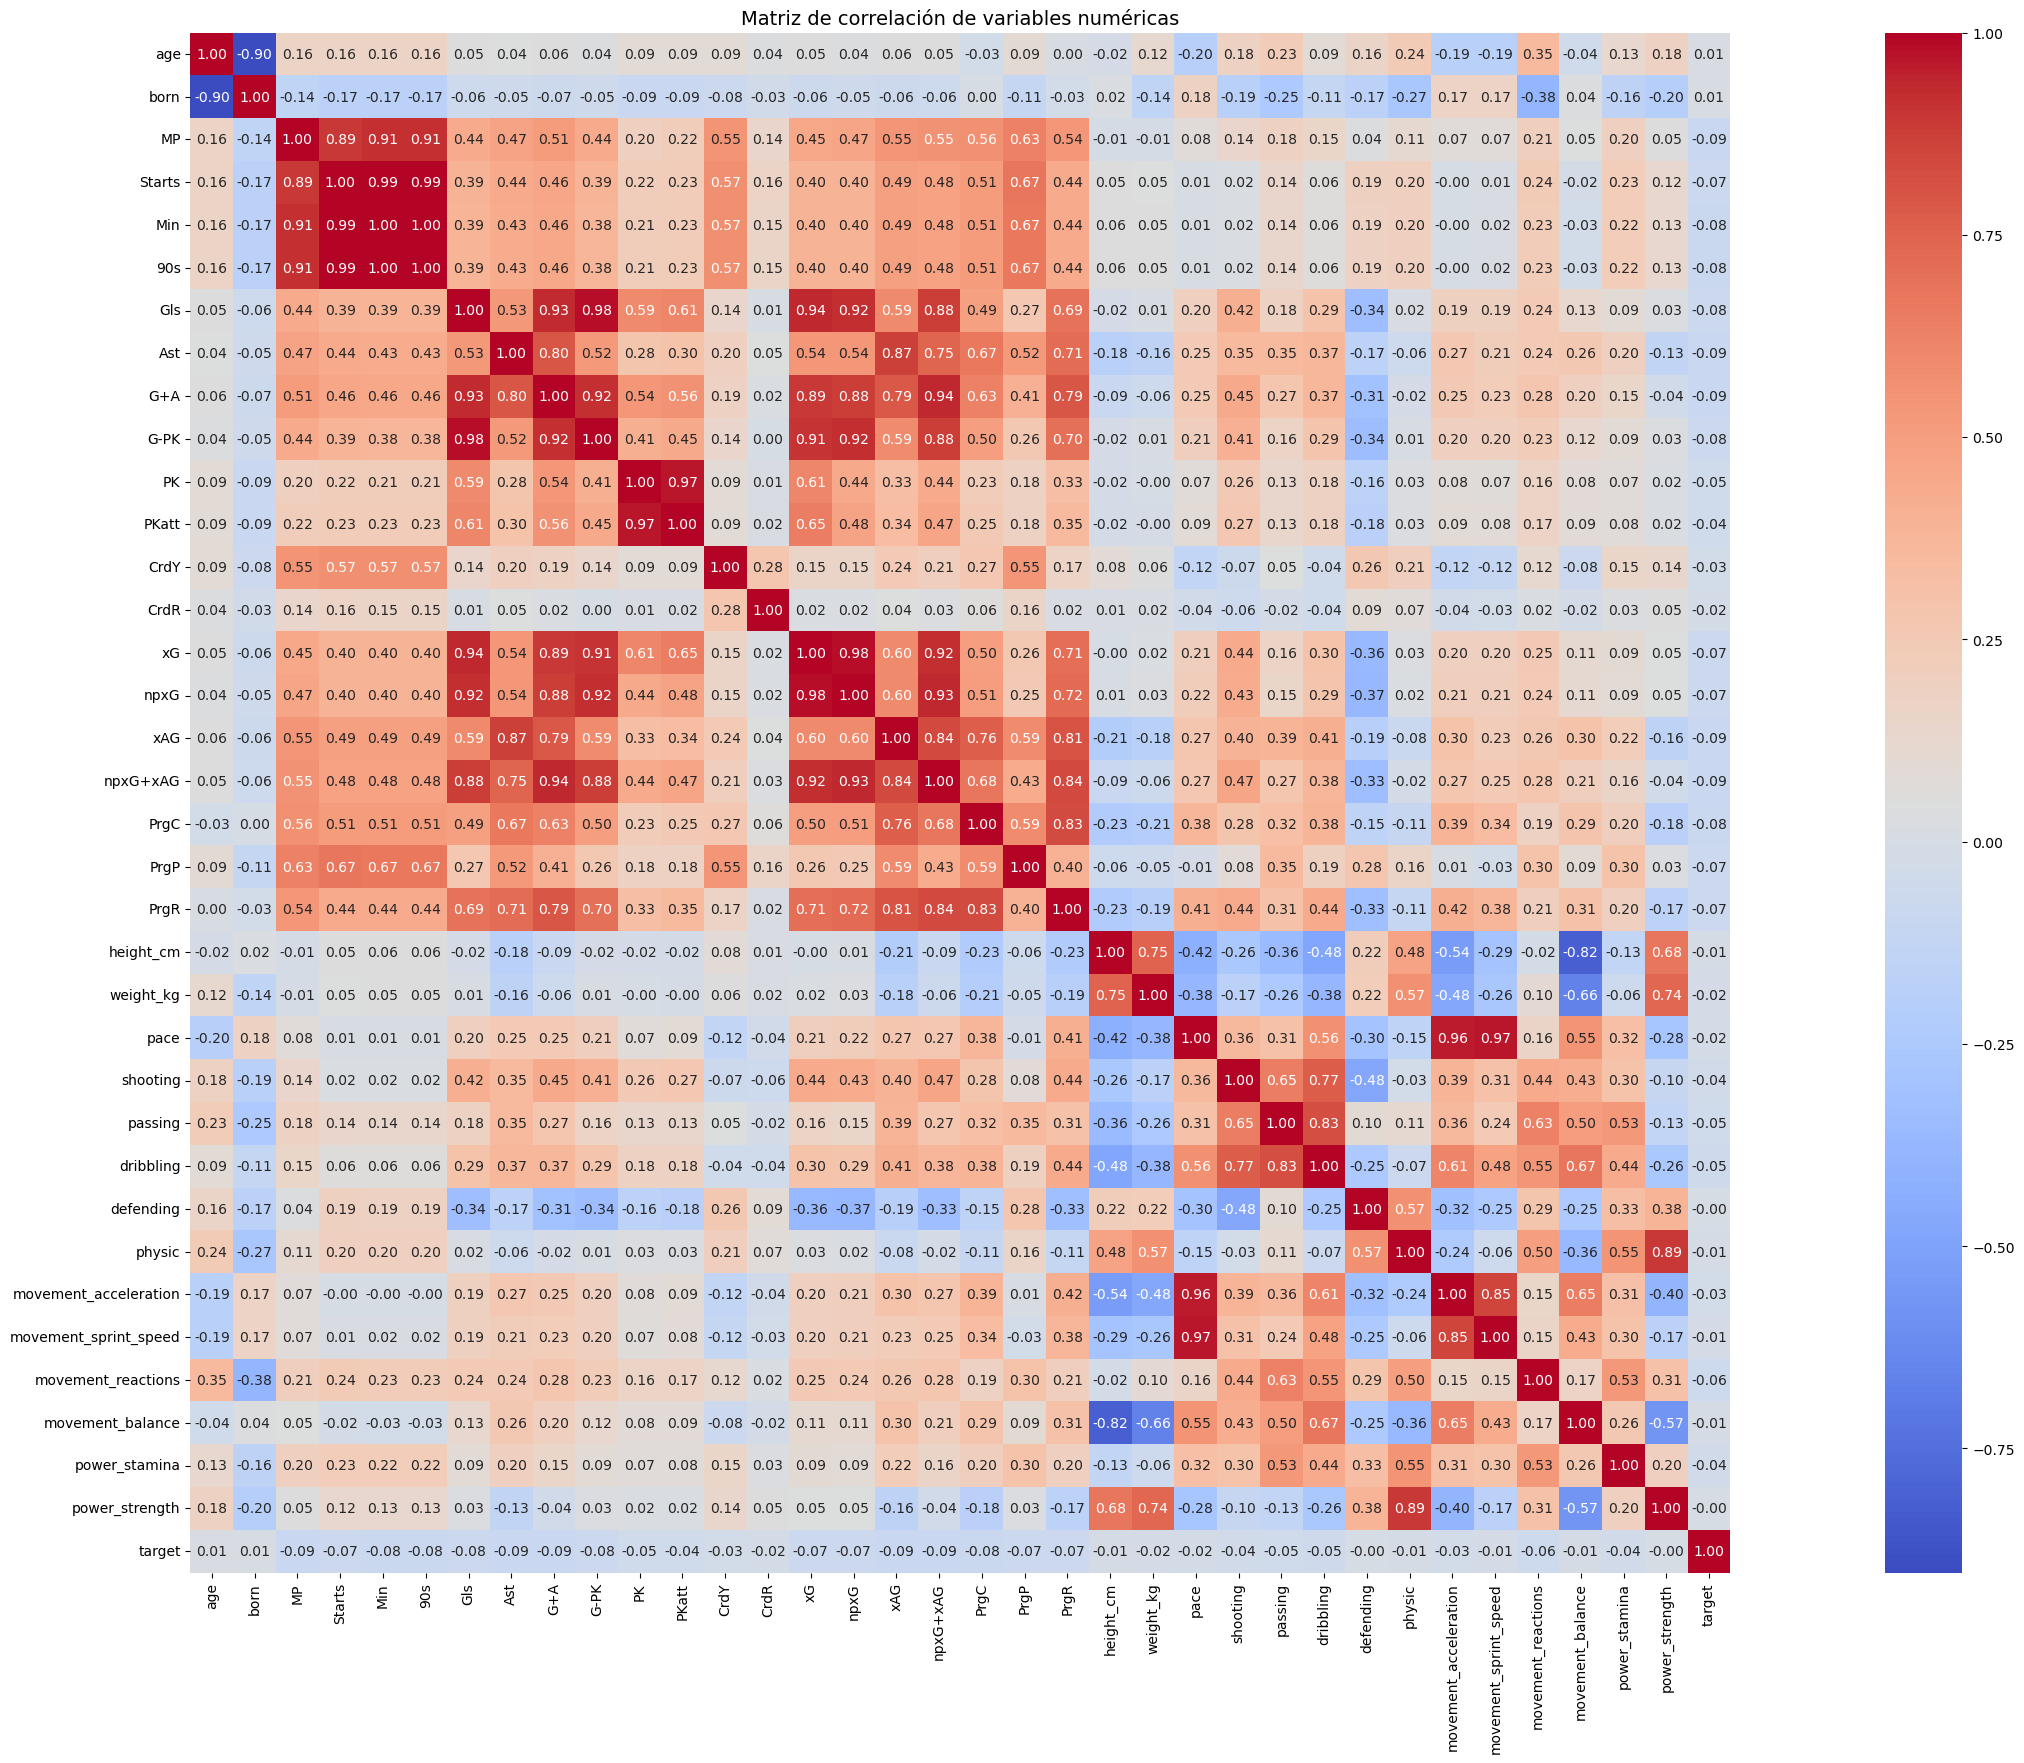

In [ ]:
numeric_df = dataframe_study.select_dtypes(include=["int64", "float64"])
numeric_df["target"]=dataframe_study["had_major_injury_28"].astype(int)
numeric_df.drop(columns=['Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'],inplace=True)

corr_matrix = numeric_df.corr()

plt.figure(figsize=(40,20))
sns.heatmap(
    corr_matrix, 
    annot=True,       
    fmt=".2f",        
    cmap="coolwarm",  
    cbar=True,        
    square=True      
)

plt.title("Matriz de correlación de variables numéricas", fontsize=14)
plt.show()


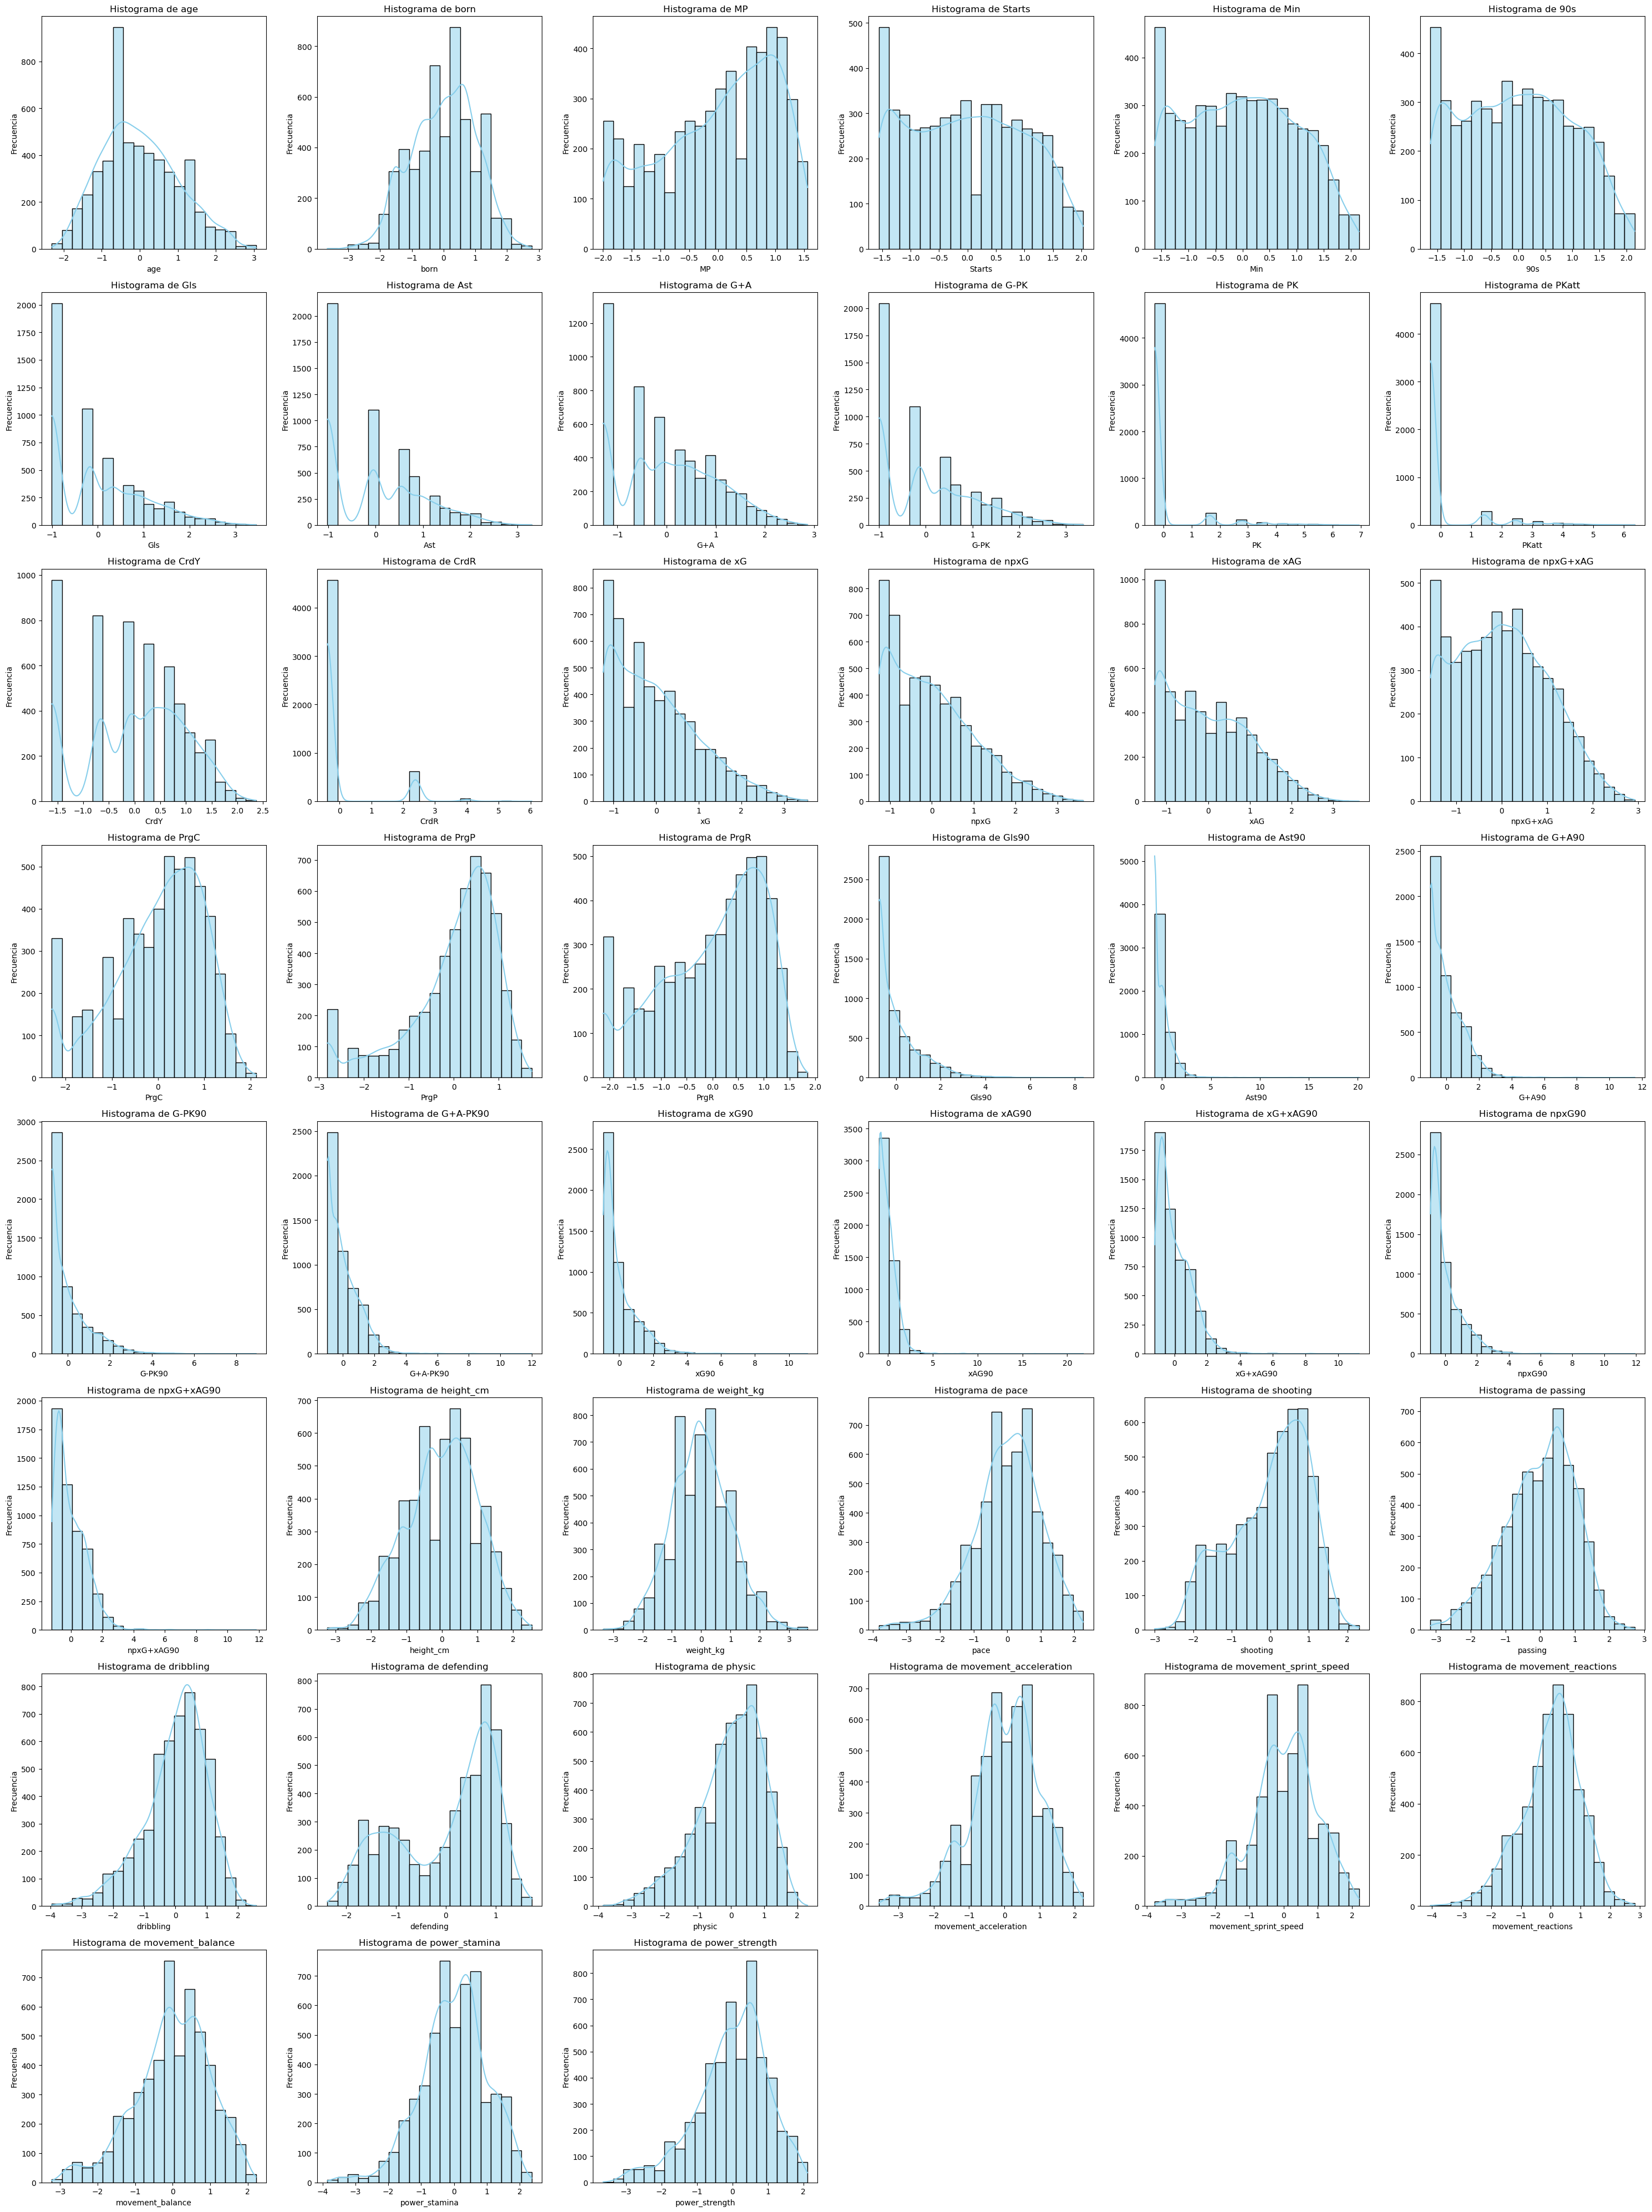

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns


n = len(num_cols)
ncols = 6 
nrows = (n // ncols) + 1

plt.figure(figsize=(30, 5*nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df_clean[col], kde=True, color="skyblue", bins=20)
    plt.title(f"Histograma de {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Se eliminaran las estadisticas que se dividen entre 90 pues se considera que no aportan información y son transformaciones directas de otras variables ya presentes

In [124]:
cat_cols = dataframe_study.select_dtypes(include=["object", "bool", "category"]).columns.tolist()
cat_cols

['player',
 'season_1',
 'had_major_injury_28',
 'nation',
 'pos',
 'work_rate',
 'body_type']

In [131]:
numeric_df.columns

Index(['age', 'born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG',
       'PrgC', 'PrgP', 'PrgR', 'height_cm', 'weight_kg', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'movement_acceleration',
       'movement_sprint_speed', 'movement_reactions', 'movement_balance',
       'power_stamina', 'power_strength', 'target'],
      dtype='object')

In [ ]:
num_cols_drop = ['G+A','G-PK','PKatt','npxG+xAG','npxG','PKatt']
df_clean.drop(columns=num_cols_drop,inplace=True)

In [ ]:
df_clean.drop(columns=['Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'],inplace=True)

/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_14072/2401219777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',


In [133]:
ordinal_vars = ['player', 'season_1', 'nation']
onehot_vars = ['pos', 'work_rate', 'body_type']
target = 'had_major_injury_28' 

In [188]:
df_test = df_clean[df_clean['season_1'] == '24/25']
df_train = df_clean[df_clean['season_1'] != '24/25']

In [136]:
df_train.shape

(4539, 47)

In [135]:
df_test.shape

(723, 47)

In [138]:
723/(4539+723)*100

13.740022805017105

Es un 16% el conjunto de entrenamiento

In [189]:
X = dataframe_study.drop(columns=target)
y = dataframe_study[target]

X_train = df_train.drop(columns=target)
y_train = df_train[target]

X_test = df_test.drop(columns=target)
y_test = df_test[target]

In [190]:
X_train.columns

Index(['player', 'season_1', 'nation', 'pos', 'age', 'born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR', 'xG', 'xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
       'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90', 'height_cm', 'weight_kg',
       'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'movement_balance', 'power_stamina',
       'power_strength'],
      dtype='object')

In [141]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), onehot_vars)
    ]
)

In [142]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score


In [195]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('modelDummy', DummyClassifier(strategy="most_frequent"))
])

In [196]:
pipeline.fit(X_train, y_train)

/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['player', 'season_1',
                                                   'nation']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['pos', 'work_rate',
                                                   'body_type'])])),
                ('modelDummy', DummyClassifier(strategy='most_frequent'))])

In [197]:
train_predicted = pipeline.predict(X_train)

In [198]:
print(classification_report(y_train,train_predicted))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      2123
        True       0.53      1.00      0.69      2416

    accuracy                           0.53      4539
   macro avg       0.27      0.50      0.35      4539
weighted avg       0.28      0.53      0.37      4539



/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
y_pred = pipeline.predict(X_test)

print("Accuracy DummyClassifier:", precision_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy DummyClassifier: 0.5242047026279392

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       344
        True       0.52      1.00      0.69       379

    accuracy                           0.52       723
   macro avg       0.26      0.50      0.34       723
weighted avg       0.27      0.52      0.36       723



/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

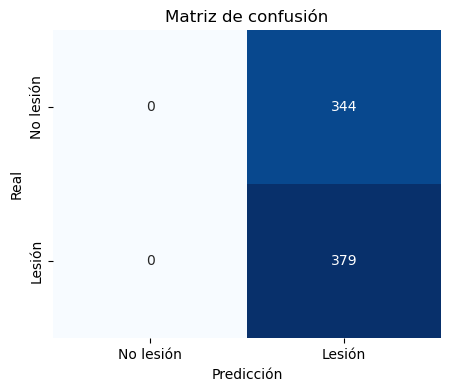

In [205]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No lesión", "Lesión"],
            yticklabels=["No lesión", "Lesión"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200,max_depth=6,min_samples_leaf=4),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [212]:
X_train.columns

Index(['player', 'season_1', 'nation', 'pos', 'age', 'born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR', 'xG', 'xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
       'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90', 'height_cm', 'weight_kg',
       'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'movement_balance', 'power_stamina',
       'power_strength'],
      dtype='object')

In [150]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

results = []
results_test=[]

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

for name, model in models.items():
    model.fit(X_train_p, y_train)
    y_pred_train = model.predict(X_train_p)
    prec_train = precision_score(y_train, y_pred_train)
    y_pred = model.predict(X_test_p)
    prec_test= precision_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Precision': prec_train
    })

    results_test.append({
        'Model': name,
        'Precision': prec_test
    })


results_df = pd.DataFrame(results).sort_values(by='Precision', ascending=False)
results_df_test = pd.DataFrame(results_test).sort_values(by='Precision', ascending=False)


/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [151]:
results_df

,Model,Precision
5,KNN,0.744252
6,Naive Bayes,0.651613
3,Gradient Boosting,0.649781
2,Random Forest,0.597188
0,Decision Tree,0.590028
1,Logistic Regression,0.557264
4,SVM,0.532276


In [153]:
results_df_test

,Model,Precision
6,Naive Bayes,0.589928
1,Logistic Regression,0.569038
3,Gradient Boosting,0.529540
4,SVM,0.524205
5,KNN,0.524194
2,Random Forest,0.522642
0,Decision Tree,0.259259


In [156]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_p, y_train)
y_pred_train = lr.predict(X_train_p)
y_pred = lr.predict(X_test_p)
print("\nReporte de clasificación Log Regression (train):\n", classification_report(y_train, y_pred_train))
print("\nReporte de clasificación Log Regression (test):\n", classification_report(y_test, y_pred))


Reporte de clasificación Log Regression (train):
               precision    recall  f1-score   support

       False       0.52      0.36      0.43      2123
        True       0.56      0.70      0.62      2416

    accuracy                           0.54      4539
   macro avg       0.54      0.53      0.52      4539
weighted avg       0.54      0.54      0.53      4539


Reporte de clasificación Log Regression (test):
               precision    recall  f1-score   support

       False       0.50      0.70      0.58       344
        True       0.57      0.36      0.44       379

    accuracy                           0.52       723
   macro avg       0.53      0.53      0.51       723
weighted avg       0.54      0.52      0.51       723



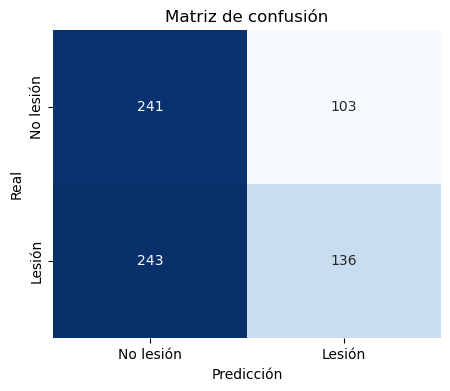

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No lesión", "Lesión"],
            yticklabels=["No lesión", "Lesión"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [158]:
nB = GaussianNB()
nB.fit(X_train_p, y_train)
y_pred_train = nB.predict(X_train_p)
y_pred = nB.predict(X_test_p)
print("\nReporte de clasificación Naive Bayes (train):\n", classification_report(y_train, y_pred_train))
print("\nReporte de clasificación Naive Bayes (test):\n", classification_report(y_test, y_pred))


Reporte de clasificación Naive Bayes (train):
               precision    recall  f1-score   support

       False       0.49      0.90      0.63      2123
        True       0.65      0.17      0.27      2416

    accuracy                           0.51      4539
   macro avg       0.57      0.53      0.45      4539
weighted avg       0.57      0.51      0.44      4539


Reporte de clasificación Naive Bayes (test):
               precision    recall  f1-score   support

       False       0.49      0.83      0.62       344
        True       0.59      0.22      0.32       379

    accuracy                           0.51       723
   macro avg       0.54      0.53      0.47       723
weighted avg       0.54      0.51      0.46       723



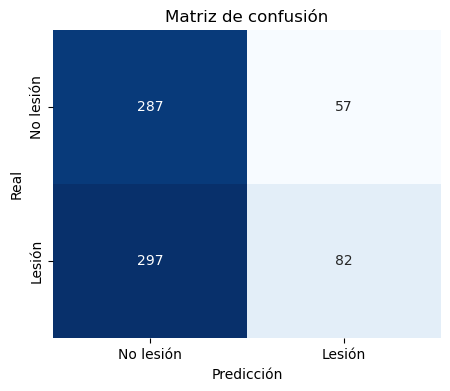

In [159]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No lesión", "Lesión"],
            yticklabels=["No lesión", "Lesión"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty": ["l1", "l2",  None],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"]
}

grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_p, y_train)
print(grid.best_params_, grid.best_score_)


/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} 0.5377824944508934


In [ ]:
y_pred_train = grid.predict(X_train_p)
y_pred = grid.predict(X_test_p)
print("\nReporte de clasificación LR Hipertuned (test):\n", classification_report(y_test, y_pred))


Reporte de clasificación LR Hipertuned (test):
               precision    recall  f1-score   support

       False       0.45      0.68      0.54       344
        True       0.45      0.24      0.31       379

    accuracy                           0.45       723
   macro avg       0.45      0.46      0.43       723
weighted avg       0.45      0.45      0.42       723



In [206]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_p, y_train)
print(grid.best_params_, grid.best_score_)


{'var_smoothing': 1e-06} 0.5148774339571323


In [ ]:
y_pred_train = grid.predict(X_train_p)
y_pred = grid.predict(X_test_p)
print("\nReporte de clasificación NB Hipertuned (test):\n", classification_report(y_test, y_pred))


Reporte de clasificación NB Hipertuned (test):
               precision    recall  f1-score   support

       False       0.51      0.80      0.62       344
        True       0.63      0.31      0.42       379

    accuracy                           0.54       723
   macro avg       0.57      0.55      0.52       723
weighted avg       0.57      0.54      0.51       723



In [208]:
print("Precision NB:", precision_score(y_test, y_pred))

Precision NB: 0.6276595744680851


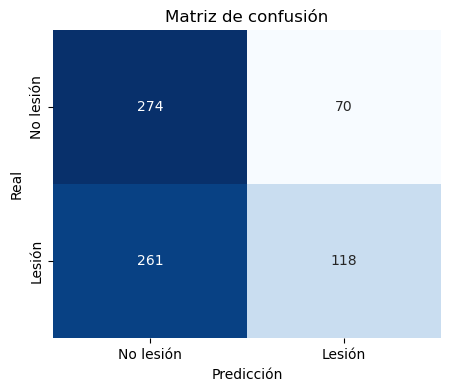

In [209]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No lesión", "Lesión"],
            yticklabels=["No lesión", "Lesión"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [210]:
print(grid.best_params_, grid.best_score_)
modelo = grid.best_estimator_

{'var_smoothing': 1e-06} 0.5148774339571323


In [ ]:
import numpy as np

means = modelo.theta_   
vars_ = modelo.var_  

importance = np.abs(means[0] - means[1]) / np.sqrt(vars_[0] + vars_[1])
